# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import time

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# Establishing url and query url for API calls
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}q={city}&APPID={weather_api_key}&units={units}"

# Set record count and set count so that we have a starting point
# for counting records in groups (sets) of 50
record_count = 1
set_count = 1

# Print header for log
print("Beginning Data Retrieval")
print("------------------------")

# Number the cities list and loop through until record count reaches
# 50, then restart record count. 
for i, city in enumerate(cities):
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    # Make API call and print call information
    query_url
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add one to record count before looping back
    record_count += 1
    
    # Set timer so as not to make more requests per minute than allotted by API
    time.sleep(1)

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | chifeng
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | poum
Processing Record 5 of Set 1 | hovd
Processing Record 6 of Set 1 | tetouan
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | qaanaaq
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | esperance
Processing Record 11 of Set 1 | tsihombe
Processing Record 12 of Set 1 | shatrovo
Processing Record 13 of Set 1 | mahon
Processing Record 14 of Set 1 | kirksville
Processing Record 15 of Set 1 | barrow
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | saint george
Processing Record 18 of Set 1 | fare
Processing Record 19 of Set 1 | tommot
Processing Record 20 of Set 1 | butaritari
Processing Record 21 of Set 1 | makakilo city
Processing Record 22 of Set 1 | longyearbyen
Processing Record 23 of Set 1 | pisco
Processing Record 24 of Set

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [36]:
# Set empty lists for creating dataframe
name = []
lat = []
lng = []
max_temp = []
humidity = []
cloud = []
wind = []
country = []
date = []

# Loop through city names and get weather data for each one
for city in cities:
    try:
        weather_response = requests.get(f"{url}q={city}&APPID={weather_api_key}&units={units}").json()
        
        name.append(weather_response['name'])
        lat.append(weather_response['coord']['lat'])
        lng.append(weather_response['coord']['lon'])
        max_temp.append(weather_response['main']['temp_max'])
        humidity.append(weather_response['main']['humidity'])
        cloud.append(weather_response['clouds']['all'])
        wind.append(weather_response['wind']['speed'])
        country.append(weather_response['sys']['country'])
        date.append(weather_response['dt'])
    
    # Skip city entries with no data
    except (KeyError, IndexError):
        pass    
    
    # Set timer so as not to make more requests per minute than allotted by API
    time.sleep(1)

# Create dictionary to convert to dataframe
cities_weather_dict = {
    "City": name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloud,
    "Wind Speed": wind,
    "Country": country,
    "Date": date
}

# Create dataframe from dict
cities_weather = pd.DataFrame(cities_weather_dict)

# Display weather dataframe
cities_weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chifeng,42.2683,118.9636,24.28,88,0,13.47,CN,1612457243
1,Jamestown,42.0970,-79.2353,34.00,80,20,5.75,US,1612457119
2,Bluff,-46.6000,168.3333,46.65,82,41,7.83,NZ,1612457245
3,Poum,-20.2333,164.0167,79.83,83,12,15.82,NC,1612457247
4,Khovd,48.0056,91.6419,20.01,81,99,6.73,MN,1612457248


In [37]:
cities_weather.count()

City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [38]:
cities_weather.to_csv('cities_weather.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [39]:
# Find rows in which 'Humidity' is > 100% 
humidity_check = cities_weather.apply(lambda x : True
            if x['Humidity'] > 100 else False, axis = 1) 
  
# Count number of True in the series 
humid_num = len(humidity_check[humidity_check == True].index) 

# Print result
print('Number of cities with humidity greater than 100%: ', humid_num ) 

Number of cities with humidity greater than 100%:  0


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

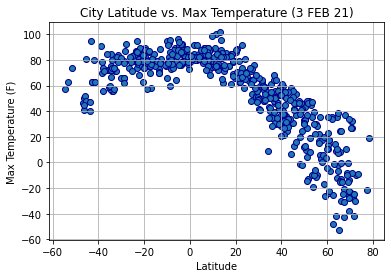

In [40]:
# Set x and y values for scatter plot
x_values1 = cities_weather["Lat"]
y_values1 = cities_weather["Max Temp"]

# Create scatter plot and
# set plot specs
plt.scatter(x_values1 ,y_values1, edgecolors= "darkblue")
plt.xlabel('Latitude')
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (3 FEB 21)")
plt.grid(which='major', axis='both')

# Display plot
plt.show()

## Latitude vs. Humidity Plot

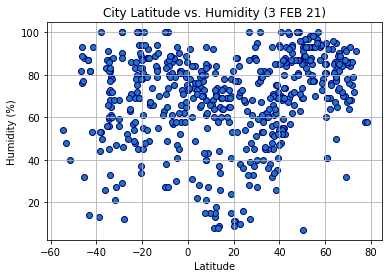

In [41]:
# Set x and y values for scatter plot
x_values2 = cities_weather["Lat"]
y_values2 = cities_weather["Humidity"]

# Create scatter plot and
# set plot specs
plt.scatter(x_values2 ,y_values2, edgecolors= "darkblue")
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (3 FEB 21)")
plt.grid(which='major', axis='both')

# Display plot
plt.show()

## Latitude vs. Cloudiness Plot

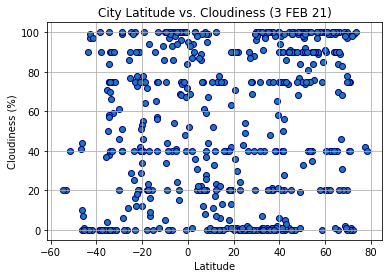

In [42]:
# Set x and y values for scatter plot
x_values3 = cities_weather["Lat"]
y_values3 = cities_weather["Cloudiness"]

# Create scatter plot and
# set plot specs
plt.scatter(x_values3 ,y_values3, edgecolors= "darkblue")
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (3 FEB 21)")
plt.grid(which='major', axis='both')

# Display plot
plt.show()

## Latitude vs. Wind Speed Plot

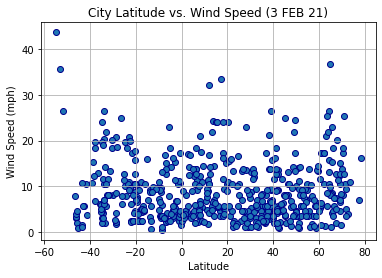

In [45]:
# Set x and y values for scatter plot
x_values4 = cities_weather["Lat"]
y_values4 = cities_weather["Wind Speed"]

# Create scatter plot and
# set plot specs
plt.scatter(x_values4 ,y_values4, edgecolors= "darkblue")
plt.xlabel('Latitude')
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (3 FEB 21)")
plt.grid(which='major', axis='both')

# Display plot
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7916425014514716


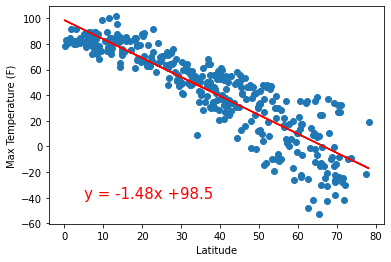

In [50]:
# Put only positive latitudes in x_values
index_names5 = cities_weather[(cities_weather['Lat'] < 0)].index 
cities_weather_north = cities_weather.drop(index_names5, inplace = False)

# Set x and y values for scatter plot
x_values5 = cities_weather_north['Lat']
y_values5 = cities_weather_north['Max Temp']

# Perform a linear regression on latitude vs. max temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values5, y_values5)

# Get regression values
regress_values = x_values5 * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create scatter plot and
# set plot specs
plt.scatter(x_values5, y_values5)
plt.plot(x_values5,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel("Max Temperature (F)")
plt.annotate(line_eq,(5,-40),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Display plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.2870424039202228


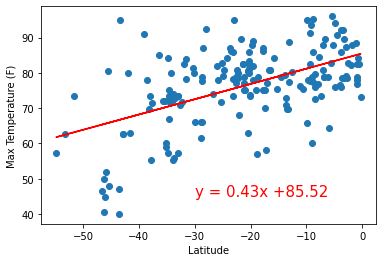

In [54]:
# Put only negative latitudes in x_values
index_names6 = cities_weather[(cities_weather['Lat'] > 0)].index 
cities_weather_south = cities_weather.drop(index_names6, inplace = False)

# Set x and y values for scatter plot
x_values6 = cities_weather_south['Lat']
y_values6 = cities_weather_south['Max Temp']

# Perform a linear regression on latitude vs. max temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values6, y_values6)

# Get regression values
regress_values = x_values6 * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create scatter plot and
# set plot specs
plt.scatter(x_values6, y_values6)
plt.plot(x_values6,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel("Max Temperature (F)")
plt.annotate(line_eq,(-30, 45),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Display plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.15363305867047294


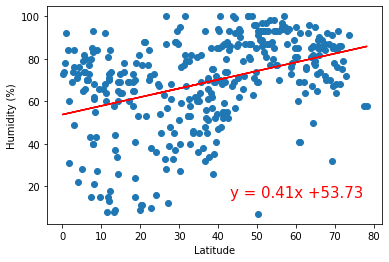

In [58]:
# Set x and y values for scatter plot
x_values7 = cities_weather_north['Lat']
y_values7 = cities_weather_north['Humidity']

# Perform a linear regression on latitude vs. humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values7, y_values7)

# Get regression values
regress_values = x_values7 * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create scatter plot and
# set plot specs
plt.scatter(x_values7, y_values7)
plt.plot(x_values7,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.annotate(line_eq,(43, 15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Display plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.018116102290626695


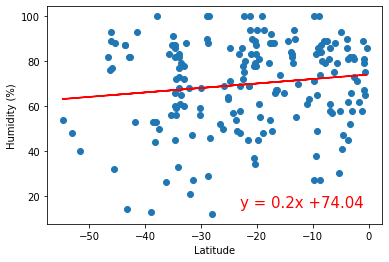

In [63]:
# Set x and y values for scatter plot
x_values8 = cities_weather_south['Lat']
y_values8 = cities_weather_south['Humidity']

# Perform a linear regression on latitude vs. humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values8, y_values8)

# Get regression values
regress_values = x_values8 * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create scatter plot and
# set plot specs
plt.scatter(x_values8, y_values8)
plt.plot(x_values8,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.annotate(line_eq,(-23, 15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Display plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.07028126047517372


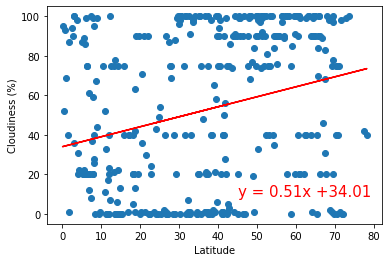

In [69]:
# Set x and y values for scatter plot
x_values9 = cities_weather_north['Lat']
y_values9 = cities_weather_north['Cloudiness']

# Perform a linear regression on latitude vs. cloudiness
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values9, y_values9)

# Get regression values
regress_values = x_values5 * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create scatter plot and
# set plot specs
plt.scatter(x_values9, y_values9)
plt.plot(x_values9,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq,(45, 9),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Display plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.10171234224198362


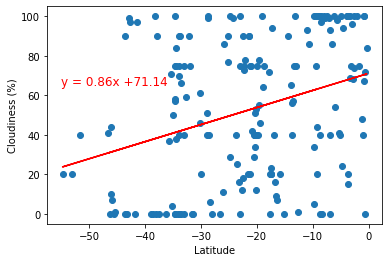

In [73]:
# Set x and y values for scatter plot
x_values10 = cities_weather_south['Lat']
y_values10 = cities_weather_south['Cloudiness']

# Perform a linear regression on latitude vs. cloudiness
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values10, y_values10)

# Get regression values
regress_values = x_values10 * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create scatter plot and
# set plot specs
plt.scatter(x_values10, y_values10)
plt.plot(x_values10,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq,(-55, 65),fontsize=12,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Display plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.001142984324516797


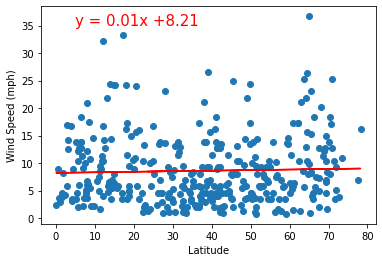

In [75]:
# Set x and y values for scatter plot
x_values11 = cities_weather_north['Lat']
y_values11 = cities_weather_north['Wind Speed']

# Perform a linear regression on latitude vs. wind speed
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values11, y_values11)

# Get regression values
regress_values = x_values11 * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create scatter plot and
# set plot specs
plt.scatter(x_values11, y_values11)
plt.plot(x_values5,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_eq,(5, 35),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Display plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.05554736422446875


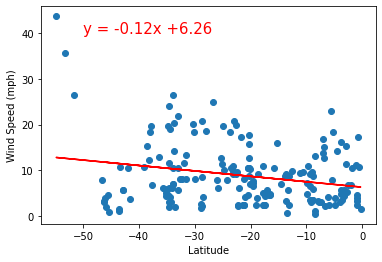

In [77]:
# Set x and y values for scatter plot
x_values12 = cities_weather_south['Lat']
y_values12 = cities_weather_south['Wind Speed']

# Perform a linear regression on latitude vs. wind speed
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values12, y_values12)

# Get regression values
regress_values = x_values12 * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create scatter plot and
# set plot specs
plt.scatter(x_values12, y_values12)
plt.plot(x_values12,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_eq,(-50, 40),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Display plot
plt.show()

# Three Observable Trends


### Latitude affects max temperature in the northern hemisphere
The strongest correlation (with an r-value of .79) can be found between latitude and max temperature in the northern hemisphere. According to our scatter plot titled "Northern Hemisphere - Max Temp vs. Latitude Linear Regression," max temperatures decline as you move northward, away from the equator.

### Latitude (probably?) affects max temperature in the southern hemisphere
The same trend can be seen in the southern hemisphere as you move south away from the equator, but the correlation of the data taken was not as strong. However, it appears we have more data for the northern hemisphere than the south. Gathering more data points for the southern hemisphere might allow for better insight.

### Wind speed, humidity, and cloudiness are not affected

With low r-values, wind speed, humidity and cloudiness did not seem to be affected by latitudinal location. 